## Datan analysointi K2020_2 - Tehtävät kerta 7

Palauta Optiman palautuslaatikkoon viimeistään su 12.4. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi: Sami Luoma-aho

# 1. Asunnon hinta
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht1.txt on 
(kuvitteellisia) asuntojen myyntihintoja ja niiden tietoja (pinta-ala, makuuhuoneiden 
lukumäärä ja saunan olemassaolo).

Tee **lineaarien regressiomalli**, jossa selittävinä muuttujina on pinta-ala, makuuhuoneiden 
lukumäärä ja saunan olemassaolo ja selitettävänä muuttujana myyntihinta. 

(Joudut muuttamaan sauna-kentän numeeriseksi)

Laske mallille selityskerroin.

Kokeile sitten mitä saat selityskertoimiksi, jos käytät selittävinä muuttuujina vain 
kahta kolmesta mahdollisesta.

Piirrä parhaasta mallista kaavio ennustetuista ja havaituista arvoista.

Tässä ei jaeta dataa opetus- ja testidataan.


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht1.txt', 
                 sep=','                                          
                 )
sauna_le=LabelEncoder()
df['sauna'] = sauna_le.fit_transform(df['sauna'])
#print(dict(zip(sauna_le.classes_,sauna_le.transform(sauna_le.classes_))))

#df=df.replace('kyllä',1)
#df=df.replace('ei',0)

x=df[['ala','makuuhuoneita','sauna']]
y=df['hinta']
malli=LinearRegression()
malli.fit(x,y)
print('Selityskerroin (ala, mh, sauna):',malli.score(x,y))

x=df[['makuuhuoneita','ala']]
malli.fit(x,y)
print('Selityskerroin (ala, mh):',malli.score(x,y))

x=df[['sauna','makuuhuoneita']]
malli.fit(x,y)
print('Selityskerroin (sauna, mh):',malli.score(x,y))

x=df[['ala','sauna']]
malli.fit(x,y)
print('Selityskerroin (ala, sauna):',malli.score(x,y))


Selityskerroin (ala, mh, sauna): 0.7442335552970591
Selityskerroin (ala, mh): 0.7335822686603743
Selityskerroin (sauna, mh): 0.25426882030277387
Selityskerroin (ala, sauna): 0.742057921659329


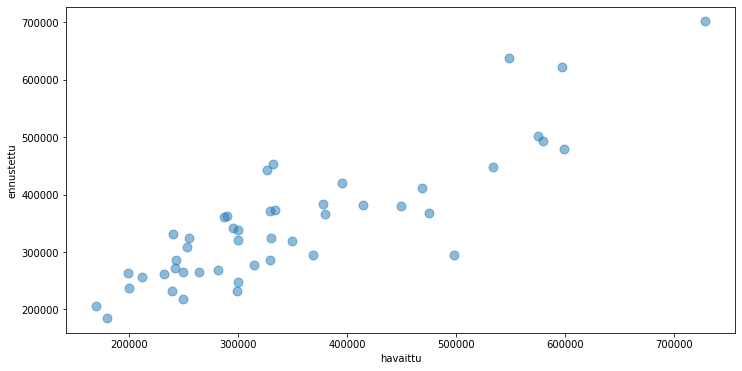

In [2]:
ennuste = malli.predict(x)
fig = plt.gcf()  #antaa nykyisen kuvion (current figure)
fig.set_size_inches(12, 6)
plt.scatter(y,ennuste,s=80,alpha=0.5)
plt.xlabel('havaittu')
plt.ylabel('ennustettu')
plt.show()

## 2. Ostaako

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht2.txt on dataa 
henkilön tuloista, sukupuolesta ja siviilisäädystä. Lisäksi on tieto onko henkilö ostanut 
tuotteen vai ei.

Tee **päätöspuu** asetuksella max_depth=4, joka yrittää selittää ostamista muiden kenttien avulla. 
Testaa sitten mallia ja  tulosta `score` ja `confusion_matrix`.

Joudut muuttamaan joitain kenttiä numeerisiksi.

Tee päätöspuusta vuokaavio (dot-tiedosto), visualisoi se ja päättele manuaalisesti sen avulla 
miten puu luokittelisi seuraavat tiedot:
* tulot 60000, naimisissa, nainen
* tulot 30000, ei-naimisissa, mies

Kirjoita vastaukseen kommenttina päättelyketjut.

Tässä ei jaeta dataa opetus- ja testidataan.

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht2.txt', 
                 sep=','                                          
                 )
sex_le=LabelEncoder()
df['sukupuoli'] = sex_le.fit_transform(df['sukupuoli'])
# print(dict(zip(sex_le.classes_,sex_le.transform(sex_le.classes_))))
# print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())
x=df[['tulot','sukupuoli','naimisissa']]
y=df['ostaa']
malli= DecisionTreeClassifier(max_depth=4)
malli.fit(x,y)
y_pred = malli.predict(x)

print("Score: ",malli.score(x,y))
print("Confusion matrix: ")
print(confusion_matrix(y, y_pred))


Score:  0.9405646359583952
Confusion matrix: 
[[520  28]
 [ 12 113]]


In [4]:
export_graphviz(decision_tree=malli, out_file="puu.dot",feature_names=x.columns, class_names=True,
                filled=True, rounded=True)

- Tulot 60000, naimisissa, nainen  
Tulot alle 57500 -> False -> Tulot alle 65500 -> True -> naimisissa<0.5 -> 
False -> Tulot alle 63000 -> True -> Ostaa

- Tulot 30000, ei-naimisissa, mies
Tulot alle 57500 -> True -> Tulot alle 46500 -> True -> Tulot alle 34500 ->
True -> Ei osta

https://tinyurl.com/tgz2yyr


## 3. Jyväskylän kämpät
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht5.txt on 
tietoja Jyväskylän toteutuneista kerrostaloasuntokaupoista  12 kk ajalta.

Jaa data opetusdataan (60%) ja testidataan (40%) ja tee opetusdatalla 
**lineaarinen regressiomalli** hinnan ennustamiseksi kentistä:
* m2
* rakennusvuosi
* hissi (muunna 0/1)
* kunto (muunna numeeriseksi)
* tee uusi kenttä onkoKeskustassa, joka saa arvon 1, jos kaupunginosa = Keskusta

Tsekkaa onko datassa puuttuvia arvoja ja korvaa ne ko. kentän mediaanilla. 

Testaa saatua mallia testidatalla.  
Piirrä hajontakaavioon ennusteen antamat arvot vs toteutuneet arvot.

In [5]:
import pandas as pd
from sklearn.preprocessing import  LabelEncoder
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht5.txt', 
                 sep=','                                          
                 )
#print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

df['kunto']=df['kunto'].fillna('eitied')
hissi_le, kunto_le = LabelEncoder(), LabelEncoder()
df['hissi'] = hissi_le.fit_transform(df['hissi'])
df['kunto'] = kunto_le.fit_transform(df['kunto'])
# print(df['kunto'].median())
# print(dict(zip(kunto_le.classes_,kunto_le.transform(kunto_le.classes_))))
df['kunto'].replace(0,df['kunto'].median())

df.loc[df['kaupunginosa'] == 'Keskusta', 'onkoKeskustassa'] = 1  
df['onkoKeskustassa'] = df['onkoKeskustassa'].fillna(0)
df.drop(['huoneisto','kaupunginosa'],axis=1,inplace=True)

x=df[['m2','rakennusvuosi','hissi','kunto','onkoKeskustassa']]
y=df['hinta']
#malli=LinearRegression()
#malli.fit(x,y)

xTrain, xTest, yTrain, yTest = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.4) 
print(xTrain.shape)
print(xTest.shape)

malli=LinearRegression()
malli.fit(xTrain,yTrain)
print("Selityskerroin: ",malli.score(xTest,yTest))

y_pred = malli.predict(xTest)


(307, 5)
(206, 5)
Selityskerroin:  0.6378578118569023


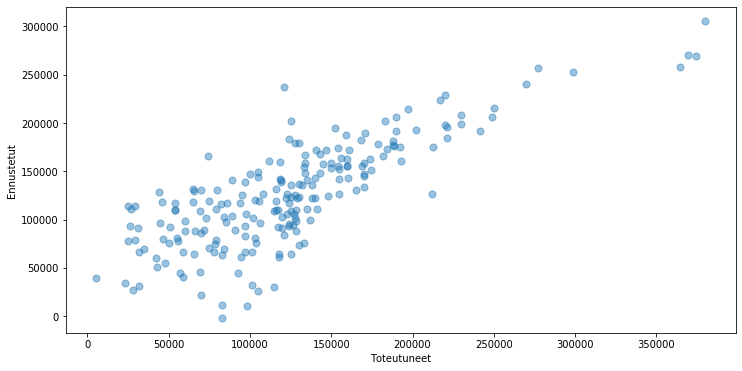

In [6]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.scatter(yTest,y_pred,s=50,alpha=0.45)
plt.xlabel('Toteutuneet')
plt.ylabel('Ennustetut')
plt.show()



## 4. Koripallo

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba_logreg.csv on 
1340 NBA-pelaajan tilastoja heidän tulokaskaudeltaan. 

[kenttien selitys (eng)](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba.png)

Viimeinen sarake kertoo onko pelaaja sittemmin pelannut NBA:ssa yli 5 kautta. Kokeile kuinka 
hyvin **logistinen regressio** pystyy ennustamaan tämän muiden kentttien (pl. pelaajan nimi) avulla. 
Korvaa tarvittaessa puuttuvat arvot ko. kentän mediaanilla. Tulosta score ja confusion matrix.

Tee sitten sama kokeilu **päätöspuun** avulla. Tulosta tästä myös kuinka paljon eri kentät 
vaikuttavat mallin mukaan ennustettavaan muuttujaan.

Tässä ei tarvitse jakaa aineistoa opetus- ja testidataan.

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

import numpy as np
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba_logreg.csv', 
                 sep=','                                          
                 )
mediaani=df['3P%'].median()
#print(df)
#print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())
df['3P%']=df['3P%'].fillna(mediaani)
df = df.drop('Name',axis=1)
x = df.drop('TARGET_5Yrs',axis=1)
y=df['TARGET_5Yrs']

scaler=StandardScaler()
x=scaler.fit_transform(x)
malli= LogisticRegression()
malli.fit(x,y)

print('----Logistisen regression Score----')
print(malli.score(x, y)) 

y_pred = malli.predict(x)
print('----Logistisen regression Confusion Matrix----')
print(confusion_matrix(y, y_pred))

malli2 = DecisionTreeClassifier()
malli2.fit(x,y)
y_pred2 = malli2.predict(x)

print('----Päätöspuun Score----')
print(malli2.score(x,y))
print('----Päätöspuun Confusion Matrix----')
print(confusion_matrix(y, y_pred2))

importances = malli2.feature_importances_

for i in range(len(importances)):
    print("Kenttä: %8s  -   Suht. tärkeys: %4.1f %%" % (df.columns[i], importances[i] * 100))
    

----Logistisen regression Score----
0.7164179104477612
----Logistisen regression Confusion Matrix----
[[266 243]
 [137 694]]
----Päätöspuun Score----
0.9850746268656716
----Päätöspuun Confusion Matrix----
[[506   3]
 [ 17 814]]
Kenttä:       GP  -   Suht. tärkeys: 20.2 %
Kenttä:      MIN  -   Suht. tärkeys: 10.4 %
Kenttä:      PTS  -   Suht. tärkeys:  3.2 %
Kenttä:      FGM  -   Suht. tärkeys:  5.7 %
Kenttä:      FGA  -   Suht. tärkeys:  0.9 %
Kenttä:      FG%  -   Suht. tärkeys:  7.5 %
Kenttä:  3P Made  -   Suht. tärkeys:  1.3 %
Kenttä:      3PA  -   Suht. tärkeys:  2.9 %
Kenttä:      3P%  -   Suht. tärkeys:  5.4 %
Kenttä:      FTM  -   Suht. tärkeys:  2.2 %
Kenttä:      FTA  -   Suht. tärkeys:  2.7 %
Kenttä:      FT%  -   Suht. tärkeys:  9.8 %
Kenttä:     OREB  -   Suht. tärkeys:  5.7 %
Kenttä:     DREB  -   Suht. tärkeys:  3.4 %
Kenttä:      REB  -   Suht. tärkeys:  5.9 %
Kenttä:      AST  -   Suht. tärkeys:  4.2 %
Kenttä:      STL  -   Suht. tärkeys:  3.4 %
Kenttä:      BLK  -   Su

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 5. Sienet
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.csv on 
tietoja sienistä (kenttien selitykset [englanniksi](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.txt)).

Pyri ennustamaan kentän _class_ arvoa muiden kenttien avulla **päätöspuulla**. 
Kentät ovat luokkamuotoisia, tyyliin 
>gill-attachment: attached=a,descending=d,free=f,notched=n

Tee siis ensin (selittävistä) kentistä dummy-kentät pandasin get_dummies-funktiolla, 
voit tehdä sen kerralla kaikille sarakkeille.

Jaa data opetusdataan ja testidataan 60/40%. 

Kokeile päätöspuulle max_depth-arvoja 2, 3, 4 ja 5 ja printtaa niiden antamat scoret ja 
confusion_matrixit.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import  LabelEncoder
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.csv', 
                 sep=','                                          
                 )

dummies = pd.get_dummies(df, prefix='dummy')
# print("Puuttuvien arvojen lukumäärä per muuttuja (1):\n%s" % df.isnull().sum())
df2 = df.apply(LabelEncoder().fit_transform)
x= df2.drop('class',axis=1)
y=df2['class']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.4, random_state = 225)

print("----- max_depth=2 ------")
malli = DecisionTreeClassifier(max_depth=2)
malli.fit(xTrain,yTrain)
print("Score",malli.score(xTest,yTest))
y_pred = malli.predict(xTest) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(yTest, y_pred))

print("----- max_depth=3 ------")
malli = DecisionTreeClassifier(max_depth=3)
malli.fit(xTrain,yTrain)
print("Score:",malli.score(xTest,yTest))
y_pred = malli.predict(xTest) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(yTest, y_pred))

print("----- max_depth=4 ------")
malli = DecisionTreeClassifier(max_depth=4)
malli.fit(xTrain,yTrain)
print("Score:",malli.score(xTest,yTest))
y_pred = malli.predict(xTest) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(yTest, y_pred))

print("----- max_depth=5 ------")
malli = DecisionTreeClassifier(max_depth=5)
malli.fit(xTrain,yTrain)
print("Score:",malli.score(xTest,yTest))
y_pred = malli.predict(xTest) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(yTest, y_pred))

----- max_depth=2 ------
Score 0.9116923076923077
[[1623   54]
 [ 233 1340]]
----- max_depth=3 ------
Score: 0.9593846153846154
[[1585   92]
 [  40 1533]]
----- max_depth=4 ------
Score: 0.9784615384615385
[[1621   56]
 [  14 1559]]
----- max_depth=5 ------
Score: 0.9809230769230769
[[1667   10]
 [  52 1521]]
